# Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import importlib

# Load Dataset

In [34]:
wine = load_wine()
X = wine.data
y = wine.target
wine_df = pd.DataFrame(X, columns=wine.feature_names)

In [35]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Dataset Overview

In [36]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [37]:
# Check for missing values
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [38]:
# Check for duplicate values
wine_df.duplicated().sum()

np.int64(0)

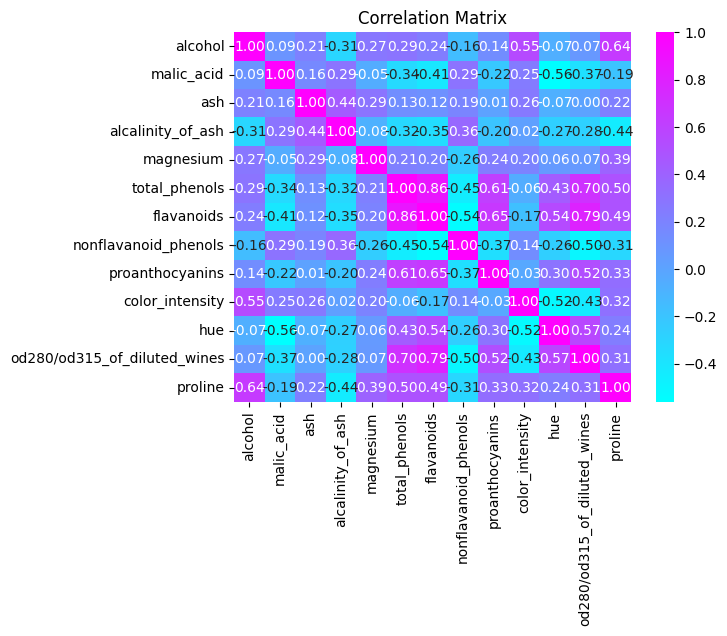

In [39]:
# Correlation Matrix
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cool', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Menghapus High Correlation Features

In [40]:
high_corr_features = ['flavanoids', 'total_phenols']
X_reduced = np.delete(X, wine.feature_names.index('flavanoids'), axis=1)
X_reduced = np.delete(X_reduced, wine.feature_names.index('total_phenols') - 1, axis=1)

X = X_reduced

# Model 1: K-Means Clustering

## Mencari Jumlah Cluster yang Optimal

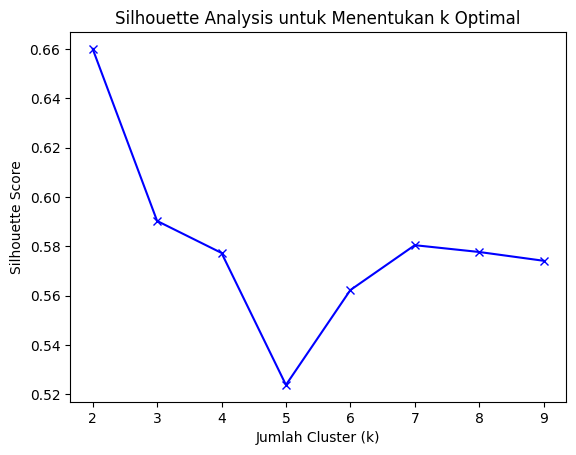

In [41]:
# Mencoba beberapa nilai k
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow method
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis untuk Menentukan k Optimal')
plt.show()


Dapat dilihat bahwa jumlah cluster yang optimal adalah 2

## Menggunakan Implementasi K-Means dari Scikit-Learn

In [42]:
kmeans_sklearn = KMeans(n_clusters=2, init='k-means++', max_iter=100, random_state=42)
kmeans_sklearn.fit(X)

sklearn_labels = kmeans_sklearn.labels_
print("Centroids (Scikit-learn):", kmeans_sklearn.cluster_centers_, sep="\n")
print("\nLabels (Scikit-learnn):", sklearn_labels, sep="\n")

# Silhouette Score
score = silhouette_score(X, sklearn_labels)
print("\nSilhouette Score (Scikit-learn):", score)

Centroids (Scikit-learn):
[[1.27028455e+01 2.54455285e+00 2.33910569e+00 2.04081301e+01
  2.06211382e+00 3.92682927e-01 1.45406504e+00 4.85138211e+00
  9.08617886e-01 2.40821138e+00 5.65869919e+02]
 [1.36665455e+01 1.87072727e+00 2.42781818e+00 1.74527273e+01
  2.81618182e+00 2.92909091e-01 1.89690909e+00 5.52036364e+00
  1.06665455e+00 3.06672727e+00 1.15172727e+03]]

Labels (Scikit-learnn):
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Silhouette Score (Scikit-learn): 0.6600722211123818


## Menggunakan Implementasi K-Means dari Scratch

In [43]:
import kmeans
importlib.reload(kmeans)

from kmeans import KMeansFromScratch

kmeans_scratch = KMeansFromScratch(n_clusters=2, max_iter=100, init='kmeans++')
kmeans_scratch.fit(X)

scratch_labels = kmeans_scratch.labels

print("Centroids (Scratch):", kmeans_scratch.centroids, sep="\n")
print("\nLabels (Scratch):", scratch_labels, sep="\n")

# Silhouette Score
score = silhouette_score(X, kmeans_scratch.labels)
print("\nSilhouette Score (Scratch):", score)

Centroids (Scratch):
[[1.27028455e+01 2.54455285e+00 2.33910569e+00 2.04081301e+01
  2.06211382e+00 3.92682927e-01 1.45406504e+00 4.85138211e+00
  9.08617886e-01 2.40821138e+00 5.65869919e+02]
 [1.36665455e+01 1.87072727e+00 2.42781818e+00 1.74527273e+01
  2.81618182e+00 2.92909091e-01 1.89690909e+00 5.52036364e+00
  1.06665455e+00 3.06672727e+00 1.15172727e+03]]

Labels (Scratch):
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Silhouette Score (Scratch): 0.6600722211123818


## Visualisasi Hasil Clustering

In [44]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

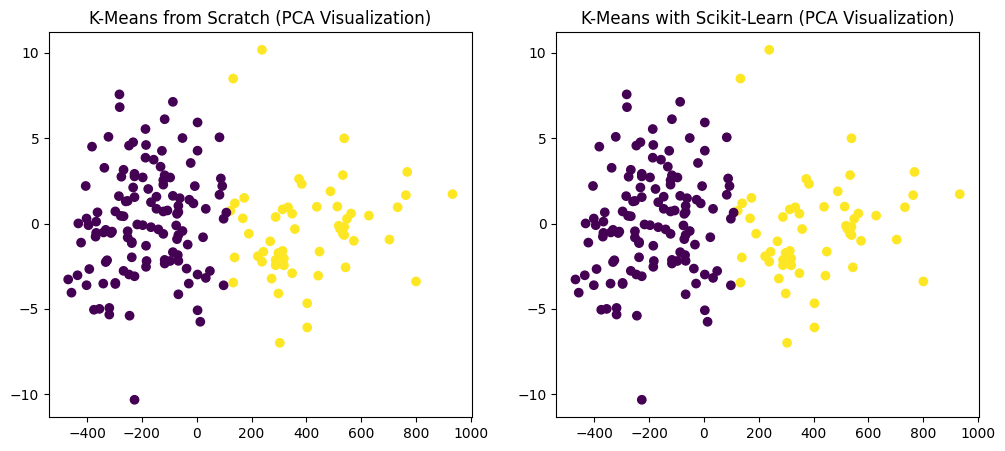

In [45]:
# Plotting K-Means from Scratch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=scratch_labels, cmap='viridis')
plt.title("K-Means from Scratch (PCA Visualization)")

# Plotting K-Means from Scikit-Learn
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sklearn_labels, cmap='viridis')
plt.title("K-Means with Scikit-Learn (PCA Visualization)")
plt.show()


# Model 2: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## Mencari Parameter Eps dan MinPts yang Optimal

In [46]:
best_epsilon = 0
best_min_samples = 0
best_silhouette = -1
eps_values = np.arange(1, 100, 0.1)  # Coba epsilon dari 1 sampai 100
min_samples_values = range(2, 10)  # Coba minimum samples dari 2 sampai 10

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:  # Pastikan setidaknya ada lebih dari 1 cluster
            silhouette_avg = silhouette_score(X, labels)
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_epsilon = eps
                best_min_samples = min_samples

print(f"Best Epsilon: {best_epsilon}, Best Min Samples: {best_min_samples}, Silhouette Score: {best_silhouette}")

Best Epsilon: 45.30000000000004, Best Min Samples: 5, Silhouette Score: 0.6086433275759079


## Menggunakan Implementasi DBSCAN dari Scratch

In [47]:
import dbscan
importlib.reload(dbscan)

from dbscan import DBSCANFromScratch

dbscan_scratch = DBSCANFromScratch(eps=45.3, min_samples=5, metric='euclidean')
dbscan_scratch.fit(X)

scratch_labels = dbscan_scratch.labels
print("Labels (Scratch):", scratch_labels, sep="\n")

# Silhouette Score
score = silhouette_score(X, dbscan_scratch.labels)
print("\nSilhouette Score (Scratch):", score)


Labels (Scratch):
[ 0  0  0 -1  1 -1  0  0  0  0 -1  0  0  0 -1  0  0  0 -1  1  1  1  0  0
  1  1  0  0  1  0  0 -1  0  0  0  1  1  0  0  1  1  0  0  1  1  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]

Silhouette Score (Scratch): 0.6086433275759079


## Menggunakan Implementasi DBSCAN dari Scikit-Learn

In [48]:
dbscan_sklearn = DBSCAN(eps=45.3, min_samples=5, metric='euclidean')
dbscan_sklearn_labels = dbscan_sklearn.fit_predict(X)

sklearn_labels = dbscan_sklearn.labels_
print("Labels (Scikit-Learn):", sklearn_labels, sep="\n")

# Silhouette Score
score = silhouette_score(X, dbscan_sklearn_labels)
print("\nSilhouette Score (Scikit-Learn):", score)

Labels (Scikit-Learn):
[ 0  0  0 -1  1 -1  0  0  0  0 -1  0  0  0 -1  0  0  0 -1  1  1  1  0  0
  1  1  0  0  1  0  0 -1  0  0  0  1  1  0  0  1  1  0  0  1  1  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]

Silhouette Score (Scikit-Learn): 0.6086433275759079


## Visualisasi Hasil Clustering

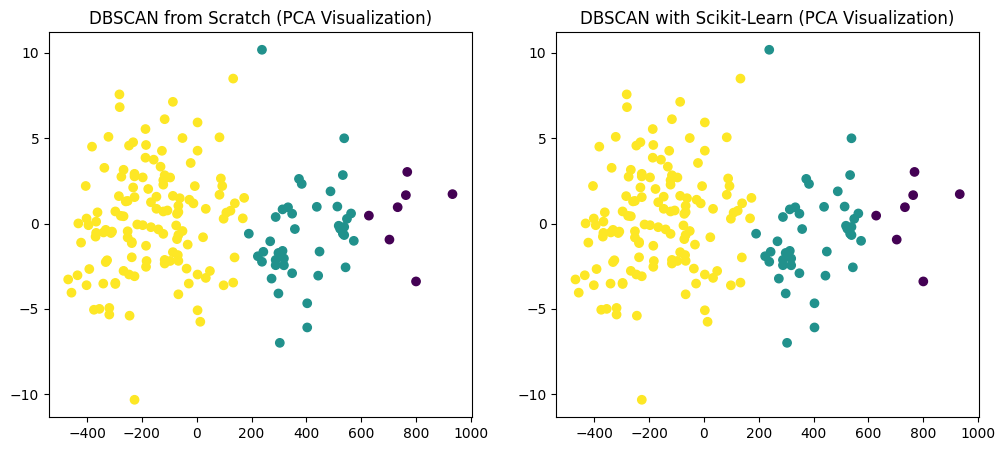

In [49]:
# Plotting DBSCAN from Scratch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=scratch_labels, cmap='viridis')
plt.title("DBSCAN from Scratch (PCA Visualization)")

# Plotting DBSCAN from Scikit-Learn
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sklearn_labels, cmap='viridis')
plt.title("DBSCAN with Scikit-Learn (PCA Visualization)")
plt.show()

# Model 3: PCA (Principal Component Analysis)

## Menggunakan Implementasi PCA dari Scratch

In [50]:
import pca
importlib.reload(pca)

from pca import PCAFromScratch

pca_scratch = PCAFromScratch(n_components=2)
pca_scratch.fit(X)

# Data hasil transformasi
X_transformed = pca_scratch.transform(X)
print("Data hasil PCA (dari scratch):\n", X_transformed)

# Explained variance
print("\nExplained Variance (dari scratch):\n", pca_scratch.explained_variance_)

Data hasil PCA (dari scratch):
 [[ 3.18125490e+02 -2.44852708e+00]
 [ 3.03140430e+02 -6.99307461e+00]
 [ 4.38107229e+02  9.77670011e-01]
 [ 7.33118887e+02  9.55551741e-01]
 [-1.19006212e+01  1.17915145e+00]
 [ 7.03123140e+02 -9.42105762e-01]
 [ 5.43125043e+02 -2.56831955e+00]
 [ 5.48109437e+02  2.74031947e-01]
 [ 2.98132324e+02 -4.10094147e+00]
 [ 2.98126877e+02 -1.72386738e+00]
 [ 7.63106494e+02  1.66229724e+00]
 [ 5.33113087e+02 -5.92914547e-01]
 [ 5.73117396e+02 -1.01540910e+00]
 [ 4.03143810e+02 -6.09156160e+00]
 [ 8.00139240e+02 -3.39471318e+00]
 [ 5.63115754e+02  5.88425711e-01]
 [ 5.33101692e+02  2.83898792e+00]
 [ 3.83104435e+02  2.32055391e+00]
 [ 9.33117960e+02  1.72182824e+00]
 [ 9.81268924e+01 -3.62188460e+00]
 [ 3.31279522e+01 -3.18736565e+00]
 [ 2.31092057e+01 -8.04570847e-01]
 [ 2.88115564e+02 -2.13393113e+00]
 [ 2.68108834e+02 -1.04233862e+00]
 [ 9.81016122e+01  2.79042418e-01]
 [ 8.30776355e+01  5.05188685e+00]
 [ 4.48116719e+02 -1.64429084e+00]
 [ 5.38108072e+02 -6.77

## Menggunakan Implementasi PCA dari Scikit-Learn

In [51]:
pca_sklearn = PCA(n_components=2)
X_transformed_sklearn = pca_sklearn.fit_transform(X)

# Data hasil transformasi
print("Data hasil PCA (Scikit-learn):\n", X_transformed_sklearn)

# Explained variance
print("\nExplained Variance (Scikit-learn):\n", pca_sklearn.explained_variance_ratio_)

Data hasil PCA (Scikit-learn):
 [[ 3.18125490e+02 -2.44852708e+00]
 [ 3.03140430e+02 -6.99307461e+00]
 [ 4.38107229e+02  9.77670011e-01]
 [ 7.33118887e+02  9.55551741e-01]
 [-1.19006212e+01  1.17915145e+00]
 [ 7.03123140e+02 -9.42105762e-01]
 [ 5.43125043e+02 -2.56831955e+00]
 [ 5.48109437e+02  2.74031947e-01]
 [ 2.98132324e+02 -4.10094147e+00]
 [ 2.98126877e+02 -1.72386738e+00]
 [ 7.63106494e+02  1.66229724e+00]
 [ 5.33113087e+02 -5.92914547e-01]
 [ 5.73117396e+02 -1.01540910e+00]
 [ 4.03143810e+02 -6.09156160e+00]
 [ 8.00139240e+02 -3.39471318e+00]
 [ 5.63115754e+02  5.88425711e-01]
 [ 5.33101692e+02  2.83898792e+00]
 [ 3.83104435e+02  2.32055391e+00]
 [ 9.33117960e+02  1.72182824e+00]
 [ 9.81268924e+01 -3.62188460e+00]
 [ 3.31279522e+01 -3.18736565e+00]
 [ 2.31092057e+01 -8.04570847e-01]
 [ 2.88115564e+02 -2.13393113e+00]
 [ 2.68108834e+02 -1.04233862e+00]
 [ 9.81016122e+01  2.79042418e-01]
 [ 8.30776355e+01  5.05188685e+00]
 [ 4.48116719e+02 -1.64429084e+00]
 [ 5.38108072e+02 -6.77

# Kesimpulan

Notebook ini telah menerapkan berbagai algoritma unsupervised learning pada dataset Wine, yaitu K-Means, DBSCAN, dan PCA, serta membandingkan implementasi algoritma dari scratch dengan implementasi yang tersedia di Scikit-learn.

Dari hasil evaluasi, baik implementasi dari scratch maupun Scikit-learn memberikan hasil yang identik dalam hal transformasi data, cluster assignments, Silhouette Score, dan explained variance. 

Proyek ini menyoroti pentingnya pemilihan parameter yang tepat dalam algoritma seperti K-Means dan DBSCAN untuk mendapatkan hasil clustering yang optimal, serta menunjukkan manfaat PCA dalam mereduksi dimensi data untuk visualisasi dan efisiensi algoritma.

Secara keseluruhan, implementasi dari scratch mampu mereplikasi hasil dari Scikit-learn dengan baik.